<div class="alert alert-success">

# Rocket launches over time: how countries and companies explored space since 50's?    

Using a dataset provided in Kaggle, this jupyter notebook explore how countries and companies contributes to rockets launches since the Sputnik 8K71PS | Sputnik-1, the first rocket launched, in 1957.

This dataset is available in [Kaggle](https://www.kaggle.com/agirlcoding/all-space-missions-from-1957) and publish to a Girl Coding. See her profile [here](https://www.kaggle.com/agirlcoding)!

Following its description, this dataset was scraped from https://nextspaceflight.com/launches/past/?page=1 and includes all the space missions since the beginning of Space Race (1957). You can see more detail consulting the original link.

Thanks to A Girl Coding to available this material to community!

I am not a specialist of spatial explorations: I am common enthusiastic of the theme and historical aspects related and see in this dataset an opportunity to explore DataViz. You are invited to mention improvements and propose corrections.
    
<hr>
    
Summary:

- Imports
- Data
- Check Sanity and Data Preparation
    - Capturing details about spaceports locations
- Which countries are representatives in spacial exploration?
- The historical reason for spatial exploration
- Number of failures: considering the top 5 relevance, which countries are more susceptible to failure?
- Further improvemnets
- Acknowledgment
- References   
    
<hr>

Are you a beginning student or enthusiastic? Look what you can see here:

- Tools to data visualization using matplotlib.pyplot
    - OBS: To generate the simplest visual pattern, I fixed the style to emulate ggplot from R in all plots.
- Use of datetime.datetime, reshape and frequency time
    
    

<div class="alert alert-success">

## Imports

In [4]:
import pandas as pd
import numpy as np

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [6]:
from dateutil.parser import parse
from datetime import datetime

In [7]:
from itertools import zip_longest

In [8]:
#plt.style.available

<div class="alert alert-success">

## Data

In [9]:
df = pd.read_csv('../data/Space_Corrected.csv')

In [10]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success


In [11]:
df.columns = [colname.strip() for colname in df.columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5   Rocket          964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


<div class="alert alert-success">

All the columns, exception of Rockets, are complete with non-null values. Unfortunately, Rocket is a col with a lot of null values. We will keep this column, but results will not be explored in this notebook.



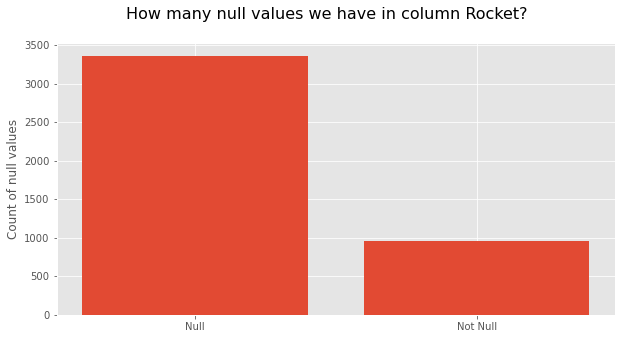

In [13]:
data = pd.DataFrame(df.Rocket.notna().value_counts())

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(x = data.index, height = data.Rocket, tick_label = ['Null', 'Not Null'])

ax.set_ylabel('Count of null values')

fig.suptitle("How many null values we have in column Rocket?", fontsize=16);

<div class="alert alert-success">

## Check Sanity and Data Preparation

Transforming variables to correct type and removing duplicate or possibly incorrect values.

In [14]:
# There are some duplicates in dataset?
df[df.duplicated(keep = False)]

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
792,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [15]:
df = df.drop_duplicates(keep = 'first')

Long March 2D | Shiyan-3 & Chuangxin-1(02) has a duplicated. Let's keep only the first row.

In [16]:
## All time zones are in UTC?
any(df.Datum.apply(lambda x: True if x.split()[-1] != 'UTC' else False))

True

In [17]:
df[df.Datum.apply(lambda x: True if x.split()[-1] != 'UTC' else False)]

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
106,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Thu Aug 29, 2019",Safir-1B+ | Nahid-1,StatusActive,NaN,Prelaunch Failure
163,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Tue Feb 05, 2019",Safir-1B+ | Dousti,StatusActive,NaN,Failure
295,Blue Origin,"Blue Origin Launch Site, West Texas, Texas, USA","Sun Dec 17, 2017",New Shepard | NS-7,StatusActive,NaN,Success
335,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Thu Jul 27, 2017",Simorgh | Test Flight,StatusActive,NaN,Failure
447,Blue Origin,"Blue Origin Launch Site, West Texas, Texas, USA","Sat Apr 02, 2016",New Shepard | NS-4,StatusActive,NaN,Success
...,...,...,...,...,...,...,...
4303,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Tue Aug 26, 1958",NOTS-EV-1 Pilot II | Pilot-5 (R2),StatusRetired,NaN,Failure
4304,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Mon Aug 25, 1958",NOTS-EV-1 Pilot II | Pilot-4 (R1),StatusRetired,NaN,Failure
4306,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Fri Aug 22, 1958",NOTS-EV-1 Pilot II | Pilot-3 (D3),StatusRetired,NaN,Failure
4308,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Tue Aug 12, 1958",NOTS-EV-1 Pilot II | Pilot-2 (D2),StatusRetired,NaN,Failure


Although 126 observation did not provided Datum, it is reasonable assume UTC to all observation.

In [18]:
df['Datum'] = df.Datum.apply(lambda x: parse(x))
df['Datum'] = pd.to_datetime(df['Datum'], utc=True)

In [19]:
df.loc[:,'Rocket'] = pd.to_numeric(df['Rocket'].str.replace(',', ''))  # remove comma and transform to int

In [20]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


#### Capturing details about spaceports locations

In [21]:
df['Location'].value_counts()

Site 31/6, Baikonur Cosmodrome, Kazakhstan                 235
Site 132/1, Plesetsk Cosmodrome, Russia                    216
Site 43/4, Plesetsk Cosmodrome, Russia                     202
Site 41/1, Plesetsk Cosmodrome, Russia                     198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                  193
                                                          ... 
K-496 Submarine, Barents Sea Launch Area, Barents Sea        1
Santa Rita 2, San Marco Launch Platform, Kenya               1
Cosmic Girl, Mojave Air and Space Port, California, USA      1
Xichang Satellite Launch Center, China                       1
K-84 Submarine, Barents Sea Launch Area, Barents Sea         1
Name: Location, Length: 137, dtype: int64

C:\Users\PICHAU\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\PICHAU\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


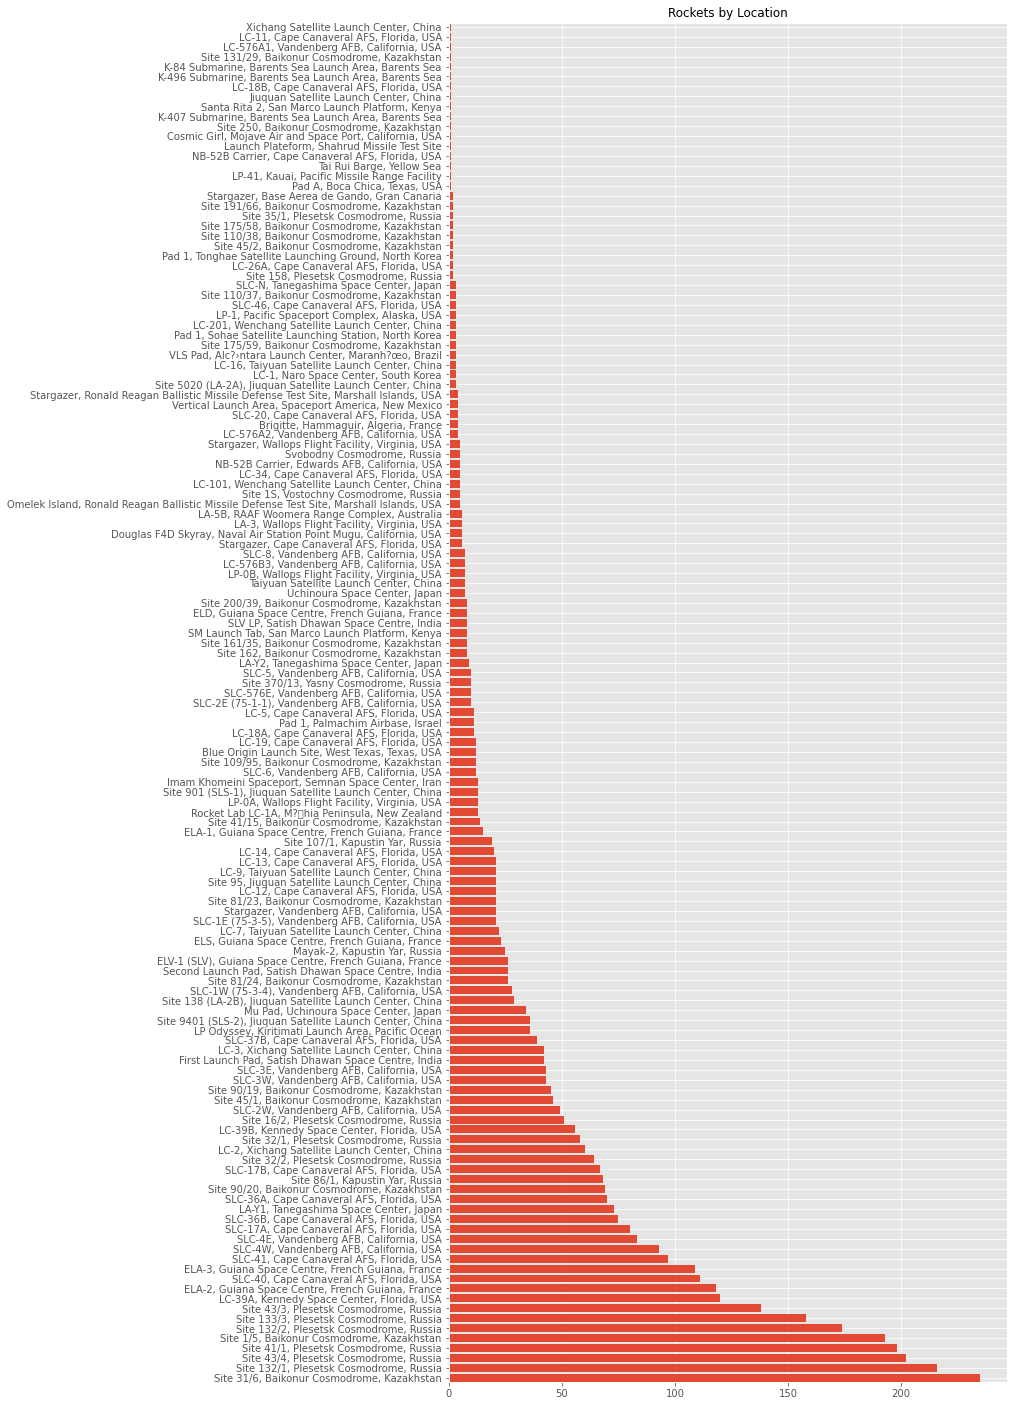

In [22]:
data = df.groupby(['Location']).count()[['Detail']].reset_index()
data = data.sort_values('Detail', ascending=False)

fig, ax = plt.subplots(figsize=(10,25))

ax.barh('Location', 'Detail', data=data)
ax.margins(y=0)

ax.set_title('Rockets by Location', fontsize=12);

Dataset provide 137 unique locations, correspondents to one or various rockets launched. This is a great diversity! We can break up the Location column in pieces more informative, achieving approximate information about rocket launch sites (sometimes also called spaceport). For instance, we capture here the code of spaceport, spaceport’s name and, finally, the country.

In [23]:
df['Country'] = df.Location.apply(lambda x: x.split(',')[-1])  # sair uma tupla e depois abrir em um zip

In [24]:
#df['Location'].apply(lambda x: len(x.split(','))) < 4

In [25]:
df['Code_spaceport'] = df['Location'].apply(lambda x: x.split(',')[0])

In [26]:
df['Name_spaceport'] = df['Location'].apply(lambda x: x.split(',')[1])

In [27]:
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

<div class="alert alert-success">

# Which countries are representatives in spacial exploration?

In [28]:
pd.unique(df.Country)

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [29]:
df_country = df.groupby('Country').count()[['Detail']].sort_values('Detail', ascending = False)
df_country  #.reset_index(inplace = True)

,Detail
Country,
Russia,1395
USA,1344
Kazakhstan,701
France,303
China,267
Japan,126
India,76
Pacific Ocean,36
New Zealand,13


<div class="alert alert-success">

Some of countries registered are not real countries, but other geographical points to locate where the rocket was launched. Here, there are few non-country rows non-country, so, it is easy correct these observations manually.
If we search for these non-country rows on internet we can discover more about these places.


Pacific Ocean register refers to LP Odyssey, Kiritimati Launch Area, Pacific Ocean. Despite the small size, Republic of Kiribati is an independent country in Oceania, but LP Odyssey is a self-propelled semi-submersible mobile spacecraft launch platform converted from a mobile drilling rig in 1997. According to a brief reference on [Wikipedia](https://en.wikipedia.org/wiki/Odyssey_(launch_platform)), don'ts sounds clear that Kiribati is owner of this spaceport: in effect, many Japanese builders are responsible for its construction while the real property belongs to S7 Airlines. Despite this, Kiribati is an island closest to launch site. In this sense, it is more convenient create a new level in column Country to embrace this case: ‘mobile’.

Vertical Launch Area, Spaceport America, New Mexico is an own of USA.

Barents Sea refers to Barents Sea Launch Area: K-84, K-496 and K-407. These are all Russian Submarines, that served as platform to launch. So, I also tag then as ‘Russia’.

Gran Canaria refers to Stargazer, Base Aerea de Gando, which is own of Spain. You can see some details [here]( https://es.wikipedia.org/wiki/Aer%C3%B3dromo_de_Pradera_del_Ganso).

LP-41, Kauai, Pacific Missile Range Facility is own of USA. Check more in that [link](https://en.wikipedia.org/wiki/Pacific_Missile_Range_Facility), but summing up: this is a U.S. naval facility and airport located ~ 9 km northwest of the Kekaha, Hawaii, United States.

Shahrud Missile Test Site is from Iran.

Tai Rui Barge, Yellow Sea looks really recent special converted barge in Yellow Sea, China. There are not precise information about this spaceport, although we can assume this is a own from China. Informations [here](http://www.parabolicarc.com/2019/06/05/china-inaugurates-sea-launch-successful-long-march-11-flight/) and [here](https://en.wikipedia.org/wiki/Long_March_11).

In [30]:
not_country = ['Pacific Ocean', 'New Mexico', 'Barents Sea', 'Gran Canaria', 
               'Pacific Missile Range Facility','Shahrud Missile Test Site', 'Yellow Sea' ]

In [31]:
df.loc[df.Country.isin(not_country)]

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Code_spaceport,Name_spaceport
35,IRGC,"Launch Plateform, Shahrud Missile Test Site",2020-04-22 03:59:00+00:00,Qased | Noor 1,StatusActive,NaN,Success,Shahrud Missile Test Site,Launch Plateform,Shahrud Missile Test Site
91,Exos,"Vertical Launch Area, Spaceport America, New M...",2019-10-26 17:40:00+00:00,SARGE | Launch 4,StatusActive,NaN,Failure,New Mexico,Vertical Launch Area,Spaceport America
127,Exos,"Vertical Launch Area, Spaceport America, New M...",2019-06-29 18:00:00+00:00,SARGE | Launch 3,StatusActive,NaN,Partial Failure,New Mexico,Vertical Launch Area,Spaceport America
133,CASC,"Tai Rui Barge, Yellow Sea",2019-06-05 04:06:00+00:00,Long March 11H | Jilin-1 & Others,StatusActive,5.3,Success,Yellow Sea,Tai Rui Barge,Yellow Sea
157,Exos,"Vertical Launch Area, Spaceport America, New M...",2019-03-02 17:45:00+00:00,SARGE | Launch 2,StatusActive,NaN,Partial Failure,New Mexico,Vertical Launch Area,Spaceport America
219,Exos,"Vertical Launch Area, Spaceport America, New M...",2018-08-25 18:15:00+00:00,SARGE | Launch 1,StatusActive,NaN,Partial Failure,New Mexico,Vertical Launch Area,Spaceport America
481,Sandia,"LP-41, Kauai, Pacific Missile Range Facility",2015-11-04 00:00:00+00:00,"Super Stripy | HiakaSat, STACEM & Others",StatusActive,15.0,Failure,Pacific Missile Range Facility,LP-41,Kauai
556,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean",2014-05-24 21:09:00+00:00,Zenit-3 SL | Eutelsat-3B,StatusActive,NaN,Success,Pacific Ocean,LP Odyssey,Kiritimati Launch Area
617,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean",2013-02-01 06:55:00+00:00,Zenit-3 SL | Intelsat-27,StatusActive,NaN,Failure,Pacific Ocean,LP Odyssey,Kiritimati Launch Area
625,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean",2012-12-03 20:43:00+00:00,Zenit-3 SL | Eutelsat-70B,StatusActive,NaN,Success,Pacific Ocean,LP Odyssey,Kiritimati Launch Area


In [32]:
not_country_correc = {'Pacific Ocean':  'mobile', 'New Mexico': 'USA', 'Barents Sea': 'Russia',
                      'Gran Canaria': 'Spain', 'Pacific Missile Range Facility': 'USA', 'Shahrud Missile Test Site': 'Iran',
                      'Yellow Sea': 'China'}

In [33]:
df.Country.replace(not_country_correc, inplace=True)

In [34]:
df.loc[df.Country.isin(not_country)]  # Yes, we solve that!

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Code_spaceport,Name_spaceport


In [35]:
df_country = df.groupby('Country').count()[['Detail']].sort_values('Detail', ascending = False)
df_country  #.reset_index(inplace = True)

,Detail
Country,
Russia,1398
USA,1349
Kazakhstan,701
France,303
China,268
Japan,126
India,76
mobile,36
Iran,14


Text(0.5, 0.98, 'Which countries are representatives in spacial exploration?')

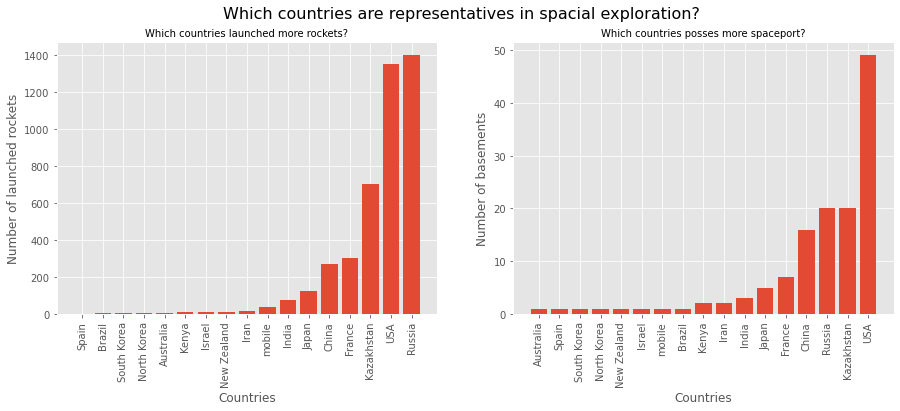

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

data = df_country.reset_index().sort_values('Detail')
ax1.bar('Country', 'Detail', data = data)

ax1.set_ylabel('Number of launched rockets')
ax1.set_xlabel('Countries')
ax1.set_title(f'Which countries launched more rockets?', {'fontsize':10})
ax1.set_xticklabels(data['Country'],rotation=90)


data = df.groupby(['Country']).nunique().sort_values('Code_spaceport')['Code_spaceport'].reset_index()
ax2.bar('Country', 'Code_spaceport', data=data)

ax2.set_ylabel('Number of basements')
ax2.set_xlabel('Countries')
ax2.set_title(f'Which countries posses more spaceport?', {'fontsize':10})
ax2.set_xticklabels(data['Country'], rotation=90)

fig.suptitle('Which countries are representatives in spacial exploration?', fontsize = 16)

In [37]:
qtd_countries = len(pd.unique(df.Country))

f"Only {qtd_countries} countries, {qtd_countries/195* 100:.4} % of all countries, launched a rocket!"

'Only 17 countries, 8.718 % of all countries, launched a rocket!'

Really Impressive! From the historical point of view we can see clearly that USA and Russia are the greatest strengths in spacial exploration.

The world has, until [2020](https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/), 195 different countries, but only 17 a countries already launched a rocket, whose is only 8.7% of total.

In [38]:
df_country['cum_sum'] = df_country['Detail'].cumsum()
df_country['cum_perc'] = 100 * df_country['cum_sum']/df_country['Detail'].sum()
df_country.head(5)

,Detail,cum_sum,cum_perc
Country,,,
Russia,1398,1398,32.338654
USA,1349,2747,63.543835
Kazakhstan,701,3448,79.759426
France,303,3751,86.768448
China,268,4019,92.967846


In [39]:
rockets_total = sum(df_country.Detail)
f'There are {rockets_total} rockets in this dataset'

'There are 4323 rockets in this dataset'

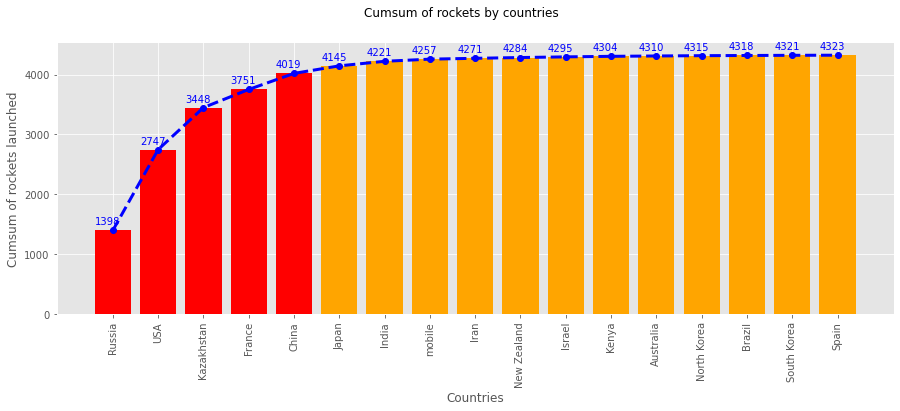

In [40]:
fig, ax = plt.subplots(figsize=(15,5))

data = df_country.sort_values('Detail', ascending = False).cumsum().reset_index()
ax.bar('Country', 'Detail', color=['red']*5 + ['orange']*20, data=data)
ax.plot('Country', 'Detail', 'bo--', lw=3, data=data)
ax.set_ylabel('Cumsum of rockets launched')
ax.set_xlabel('Countries')

xlocs, xlabs = plt.xticks()
for i, v in enumerate(df_country['cum_sum']):
    plt.text(xlocs[i] - 0.4, v + 100, f'{str(v)}', color = 'blue')


plt.xticks(rotation=90)

fig.suptitle('Cumsum of rockets by countries', fontsize=12);

<div class="alert alert-success">

The first five countries clearly respond for more than 90 % of total rockets launched. Although USA and Russia together sum 63% of total rockets launched, there are other important emergent countries that also has an important contribution, namely, Kazakhstan, France, and China.

OBS: This dataset considers the current geographical political regions in the world, but, both Russia and Kazakhstan were members of Republics of the Union of Soviet Socialist Republics.


In [41]:
df_top_countries = df_country.index[:5]
df_top_countries

Index(['Russia', 'USA', 'Kazakhstan', 'France', 'China'], dtype='object', name='Country')

In [42]:
# df[df.Country.isin(df_top_countries)]

<div class="alert alert-success">

# The historical reason for spatial exploration:

It is important analyses a temporal series to discover the pattern of rocket launches in time. Let's check this!

In [43]:
df.set_index('Datum', inplace=True)

<div class="alert alert-warning" role="alert">
A tip!
    
plot.bar in pandas is the easier way to create this barplot, but with less personalized options. For a scratch graph, it is a great alternative. See below.

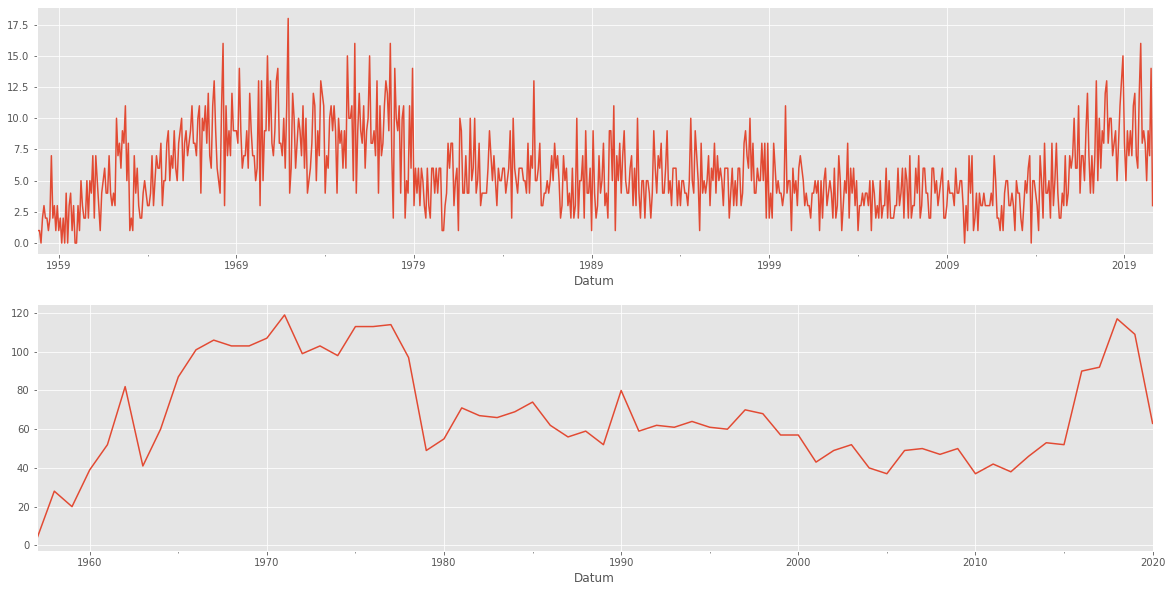

In [44]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

df.resample("M").count()[['Location']].plot(ax=ax1, legend=False)
df.resample("Y").count()[['Location']].plot(ax=ax2, legend=False)

In [45]:
df.reset_index(inplace = True)

In [46]:
df_crosstab = pd.crosstab(df.Datum, df.Country)
df_crosstab = df_crosstab.resample('Y').sum()[df_top_countries]

In [47]:
df_crosstab.reset_index(inplace=True)

In [48]:
df_crosstab.head(3)

Country,Datum,Russia,USA,Kazakhstan,France,China
0,1957-12-31 00:00:00+00:00,0,1,2,0,0
1,1958-12-31 00:00:00+00:00,0,23,5,0,0
2,1959-12-31 00:00:00+00:00,0,16,4,0,0


In [49]:
df_crosstab.columns

Index(['Datum', 'Russia', 'USA', 'Kazakhstan', 'France', 'China'], dtype='object', name='Country')

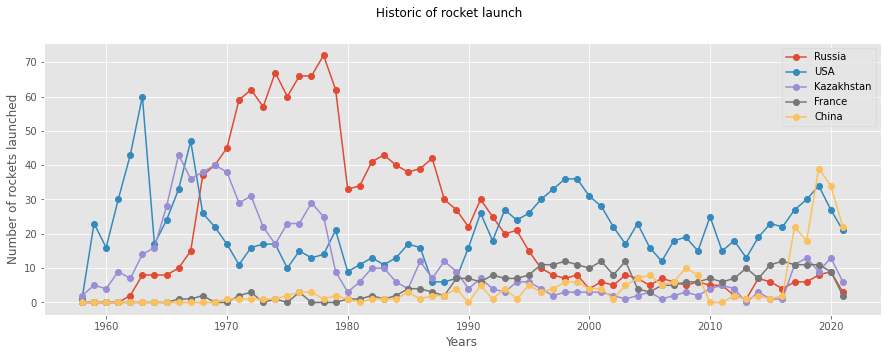

In [60]:
current_palette = sns.color_palette()

fig, ax = plt.subplots(figsize=(15,5))

for i, top_countries in enumerate(df_top_countries):
    ax.plot('Datum', top_countries, 
            marker='o', color=current_palette[i], 
            data=df_crosstab)

ax.set_ylabel('Number of rockets launched')
ax.set_xlabel('Years')

plt.legend()

fig.suptitle('Historic of rocket launch', fontsize=12);

<div class="alert alert-success">

Kazakhstan shares frontier with Russian and there is a historical and political relationship between these nations, which were both member of USSR.

Look below: the two first rockets registered, dated in 1987, are the famous Sputnik-1 and Sputnik-2, that are commonly recognized as soviet satellites. In reality, in this time Kazakhstan was one of country inserted in the USSR and this technology type looks still shared between Russian and Kazakhstan until nowadays. If we consider both countries together, we can note a high mass of rocket launched since 1960 until 1990, but a decline in the last years.

While Russia suffer a decline in last years, USA keep periodic launches along the years, since 1950 when launched their first rocket. We can also see higher values for rockets launched between 1960 and 1970, with oscillation between years, but there are rockets launches constantly, especially when compared to other countries.

Throughout the 1960s and 1970's, the great volume of rockets launches by countries member of Soviet Union and USA are expected, since the dispute between great potencies during Cold War passed also for competition for development in spatial area. This is also well-known as [Space Race](https://en.wikipedia.org/wiki/Space_Race).

On the other hand, as a surprise to me, France is also an antique and relevant country in rocket launches since 1960’s. The French space program includes both civil and military spaceflight activities. Along with the USSR and the USA: it is the 3rd oldest institutional space program in history (as you can see in our graph), and the largest space program in Europe (what is also true until now a days, considering the quantify of rockets). You can check more about this here [link](https://en.wikipedia.org/wiki/French_space_program).

China has been investing in several technologies’ areas since his more recent market opening. It is possible see a sharp rise in the recent years, despite a modest historical contribution


In [61]:
df.sort_values('Datum')[['Datum', 'Detail']].head(5)

,Datum,Detail
4322,1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1
4321,1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2
4320,1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3
4319,1958-02-01 03:48:00+00:00,Juno I | Explorer 1
4318,1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU


<div class="alert alert-success">

# Number of failures: considering the top 5 relevance, which countries are more susceptible to failure?

In [62]:
pd.unique(df['Status Mission'])

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [63]:
df['Status Mission'] = ['Failure' if status != 'Success' else 'Success' for status in df['Status Mission']]

In [64]:
pd.unique(df['Status Mission'])

array(['Success', 'Failure'], dtype=object)

In [65]:
top_countries = df_top_countries.to_list()

In [66]:
df['Country'] = [country if country in(top_countries) else 'Other' for country in df['Country']]

In [67]:
data = pd.crosstab(df['Country'], df['Status Mission'])
data

Status Mission,Failure,Success
Country,,
China,25,243
France,18,285
Kazakhstan,93,608
Other,53,251
Russia,93,1305
USA,163,1186


In [68]:
data.sort_values('Success', ascending=False).index.to_list()  # automatizar isso...

['Russia', 'USA', 'Kazakhstan', 'France', 'Other', 'China']

In [69]:
data = data.reindex(['Russia', 'USA', 'Kazakhstan', 'France', 'China','Other'])[['Success', 'Failure']]

In [70]:
failure_prop = data['Failure'].div(data['Success']) * 100
failure_prop

Country
Russia         7.126437
USA           13.743676
Kazakhstan    15.296053
France         6.315789
China         10.288066
Other         21.115538
dtype: float64

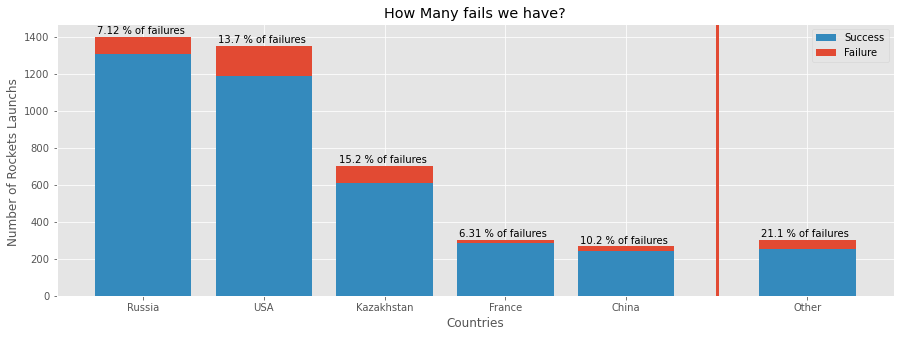

In [71]:
x = [1,2,3,4,5,6.5]
color_duo = {"Success": current_palette[1], "Failure": current_palette[0]}

fig, ax = plt.subplots(figsize=(15,5))

for i, status in enumerate(data.columns):
    plt.bar(x, data.iloc[:,i], bottom=np.sum(data.iloc[:,:i], axis=1),
            color=color_duo.get(status), label=data.columns[i])

for i, (prop, value) in enumerate(zip(failure_prop, data.sum(axis=1))):
    plt.text(x[i] - 0.38, value + 15, f'{str(prop):.4} % of failures')

plt.title(f'How Many fails we have?')
plt.ylabel(f'Number of Rockets Launchs ')
plt.xlabel('Countries')

plt.xticks(x, data.index)

plt.legend()

plt.axvline(x=5.75, lw = 3);

As a general pattern, countries, despite the quantity of rockets launched, keep a low proportion of failure.

<div class="alert alert-success">

### Which companies are relevant to spatial exploration?

In [72]:
data = df.groupby('Company Name').count()[['Detail']].sort_values('Detail', ascending=False).reset_index()

In [73]:
companies_top = data.head(15)['Company Name'].to_list()
companies_top

['RVSN USSR',
 'Arianespace',
 'General Dynamics',
 'CASC',
 'NASA',
 'VKS RF',
 'US Air Force',
 'ULA',
 'Boeing',
 'Martin Marietta',
 'SpaceX',
 'MHI',
 'Northrop',
 'Lockheed',
 'ISRO']

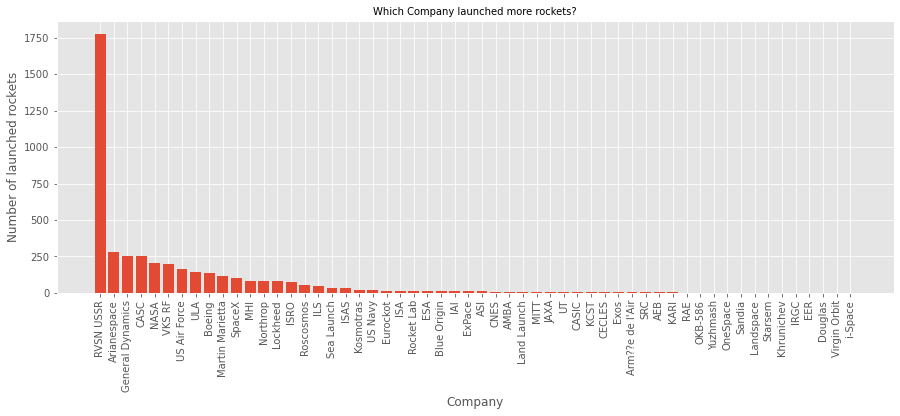

In [74]:
fig, ax = plt.subplots(figsize=(15,5))

ax.bar('Company Name', 'Detail', data = data)

ax.set_ylabel('Number of launched rockets')
ax.set_xlabel('Company')
ax.set_title(f'Which Company launched more rockets?', {'fontsize':10})
ax.set_xticklabels(data['Company Name'],rotation=90);

In [75]:
df_companies = pd.crosstab(df['Datum'], df['Company Name'])
df_companies = df_companies.resample('Y').sum()

In [76]:
df_companies = df_companies.replace(0, np.nan)

In [77]:
df_companies.head(3)

Company Name,AEB,AMBA,ASI,Arianespace,Arm??e de l'Air,Blue Origin,Boeing,CASC,CASIC,CECLES,...,SpaceX,Starsem,ULA,US Air Force,US Navy,UT,VKS RF,Virgin Orbit,Yuzhmash,i-Space
Datum,,,,,,,,,,,,,,,,,,,,,
1957-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1958-12-31 00:00:00+00:00,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,12.0,NaN,NaN,NaN,NaN,NaN
1959-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,4.0,NaN,NaN,NaN,NaN,NaN


In [78]:
def first_launch(df, col):
    first_index = df[col].notna().idxmax()  # first valid index
    value = df[col].loc[first_index]  # nosso valor
    return(first_index, value)

In [79]:
# For instance:
first_launch(df_companies,'SpaceX')

(Timestamp('2006-12-31 00:00:00+0000', tz='UTC', freq='A-DEC'), 1.0)

In [80]:
#df_companies.truncate(before=first_index)  

A good recipe to iterate over chuncks: [link here](https://stackoverflow.com/questions/434287/what-is-the-most-pythonic-way-to-iterate-over-a-list-in-chunks).

In [81]:
def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

In [283]:
companies_top

['RVSN USSR',
 'Arianespace',
 'General Dynamics',
 'CASC',
 'NASA',
 'VKS RF',
 'US Air Force',
 'ULA',
 'Boeing',
 'Martin Marietta',
 'SpaceX',
 'MHI',
 'Northrop',
 'Lockheed',
 'ISRO']

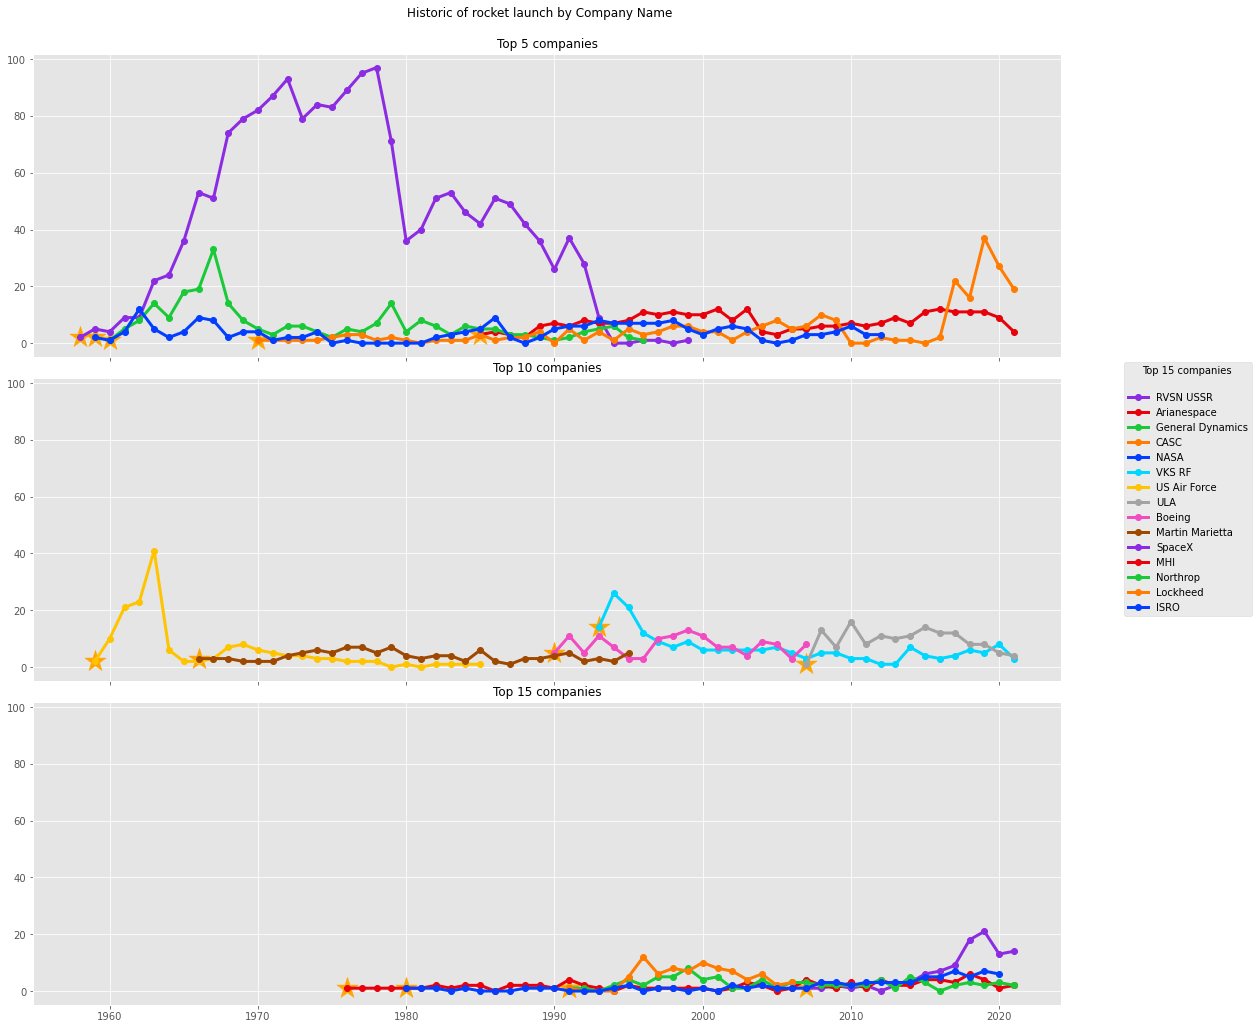

In [281]:
chunck_title = {0: 'Top 5', 1:'Top 10', 2:'Top 15'}
palette = sns.color_palette("bright", n_colors=16)
palette.reverse()

fig, ax = plt.subplots(3,1, figsize=(15,15), sharey='all', sharex='all')

fig.suptitle('Historic of rocket launch by Company Name');
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

count = 0
for chunk, companies in enumerate(grouper(companies_top, 5)):  # Tentar um loop dentro do outro com itertool
    for company in companies:
        count +=1
        first_index, first_value = first_launch(df_companies, company)
        last_index = df_companies[company].notna()[::-1].idxmax()  # last valid index

        ax[chunk].plot('Datum', company, marker='o', lw=3, color=palette[count],
                data = df_companies.replace(np.nan, 0).loc[first_index:last_index, company].reset_index())
        
        ax[chunk].scatter(first_index, first_value, s=500, marker="*", color='orange')
        ax[chunk].set_title(f'{chunck_title.get(chunk)} companies',fontsize=12)
    
fig.legend(title='Top 15 companies \n',
           loc='center', bbox_to_anchor=(1.1, 0.5))

<div class="alert alert-success">

Some points pertinent:

The USSR apport in rockets launches is a product of one enterprise, although the USA has a great contribution from NSA, there are also more sprayed investments from other companies, as example Martin Marietta - historically - and Space X more recently.

We see that between years is a rare event a continuous quantify in rockets launched. We cannot have a seasonal pattern, but we can see a soft oscillation between years. This may be a consequence of research cycle or the amount of financial support to rockets construction and launch.

The top 5 corporations are old companies, dated especially since 1960. We do not know what enterprises are still working based purely in this dataset. In contrast, around all the world there are new companies also give this contribution along the years.

# Further improvemnets

- Unfortunately, still there are large amount null values in column Rocket and this create a loss of analysis quality. There is an information enough to web scrapers site considering the information provided in column ‘Detail’. Future steps must include more information about rockets to understand more about the evolution in technology and not restrict evaluation to a biogeographic and commercial pattern timeline.

    
# Acknowledgment

Again, thanks to A Girl Coding to available this material.

# References

- The dataset is avaiable in: https://www.kaggle.com/agirlcoding/all-space-missions-from-1957 
- The dataset was scraped from https://nextspaceflight.com/launches/past/?page=1 
- Check for references about content in the text.